# ✍️📄 Goal of the Competition

### **[Goal of the Competition]**
To predict the score of each of the six measures for the essays given in the test set.
[They (Six Measures) are NOT “Mathematical Metrics” but result from Teacher’s subjective scores.](http://www.the-learning-agency-lab.com/the-feedback-prize/)

**Therefore, the goal of this competition is to construct a pipeline that captures the relationship between human subjectively evaluated scores and training data,  
learns the model, and predicts scores on new student essay data  
(Regression Analysis Task)**

# ✍️📈 Description: Six Measures

Each measure represents **a component of proficiency** in essay writing, with greater scores corresponding to greater proficiency in that measure.  
The scores range from `1.0`to `5.0`in increments of `0.5`. 

### **1) cohesion**

**[Definition]**  
the [grammatical](https://en.wikipedia.org/wiki/Grammar) and [lexical](https://en.wikipedia.org/wiki/Lexicon) linking within a text or [sentence](https://en.wikipedia.org/wiki/Sentence_(linguistics)) that holds a text together and gives it meaning. It is related to the broader concept of [coherence](https://en.wikipedia.org/wiki/Coherence_(linguistics)).  
a term in linguistics that refers to how the structure and content of a [sentence](https://www.twinkl.kr/teaching-wiki/sentence)
or text is linked together to create meaning.

**[Importance]**  
**Cohesion** means that writing is well structured with linked ideas that follow a logical pattern. Sentences and paragraphs flow smoothly and are written in the same tense,  
meaning the piece of writing as a whole is fluid and makes sense.
It is important for children to learn about cohesion, as it builds literacy and creative writing skills.

**Cohesion** is important as:

- It teaches children how to order and structure sentences and paragraphs
- It means related ideas are kept together and flow logically from one to another
- It helps children express their ideas in a way that the reader will clearly understand
    
### **2) syntax**

**[Definition]**  
a set of rules, principles, and processes that preside over the structuring of sentences in any given language.  
Syntax defines the rules that need to be followed when [forming a sentence](https://7esl.com/sentence/) from [words](https://7esl.com/words/), clauses, [punctuation](https://7esl.com/punctuation/), and phrases.

**[Importance]**  
Learning how to create a grammatical sentence is one of the most important aspects of language learning.  
Developing your syntax knowledge will help you create more complex sentences and make them sound natural.

Learning how to construct a sentence is crucial to reading. It allows you to understand the idea within and between words, and to integrate this information with background knowledge.  
Syntax provides an organizational structure for ideas, and supports your understanding of the subject matter.

### **3) vocabulary**

**[Definition]**  
a set of familiar words that a person knows. Usually developed with age,  
vocabulary is a useful and essential tool that helps children (and adults!) to communicate and expand their knowledge.

**[Importance]**  
Vocabulary is important for speaking and communicating, but it's also essential for reading. It's the key to solid reading comprehension  
it's impossible to read and understand a text if you don't know what the words mean!

When reading a text, we use our vocabulary knowledge to decode what the text is telling us.  
With a limited vocabulary, it'll be difficult to understand most of the words. This will restrict the overall understanding of the text.
    
### **4) phraseology**

**[Definition]**  
the study of set or fixed expressions, such as idioms, phrasal verbs, and other types of multi-word lexical units (often collectively referred to as phrasemes), in which the component parts of the expression take on a meaning more specific than, or otherwise not predictable from, the sum of their meanings when used independently.

**[Importance]**  
It is a very important factor in smooth communication because the meanings of several words(phraseology) are not simply combined but contain metaphorical meanings.    
    
### **5) grammar**

**[Definition]**  
the way we arrange words to make proper sentences

**[Importance]**  
In English, grammar encompasses word order (syntax), tenses (past, present, future etc) and different word types (nouns, verbs, adjectives etc). English grammar is the foundation of good communication, reading comprehension, writing and story-telling.
     
### **6) conventions**

**[Definition]**  
the rules people must follow when writing any kind of text. Whether you're writing a story or a political speech, there are certain principles (Spelling, Punctuation, Capitalisation, Grammar)

**[Importance]**  
help the reader understand what they are reading. If the spelling, punctuation, and grammar was all incorrect, then no-one would be able to read and enjoy the text!

# ✍️📈 Evaluation Metrics: MCRMSE
Errors of each K-Fold Cross Validation trials were averaged over N test samples across M target variables.\
**In other words, MCRMSE is the Arithmetic Mean of RMSE**

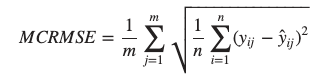

# 🏆🚴 Pilot Competition
[[****Feedback Prize - Predicting Effective Arguments****]](https://www.kaggle.com/competitions/feedback-prize-effectiveness/data)

[[****Feedback Prize - Evaluating Student Writing****]](https://www.kaggle.com/competitions/feedback-prize-2021/data)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as matp
import matplotlib.gridspec as gridspec

import sys, os, gc
import re # Remove Un-Target Language
import json
import tensorflow as tf
import nltk

from tqdm.notebook import tqdm 
from bs4 import BeautifulSoup # Remove html & css Tag
from nltk.corpus import stopwords # Remove Stopwords
from wordcloud import WordCloud, STOPWORDS
from tensorflow.keras.preprocessing.sequence import pad_sequences # 모든 입력 문장의 길이 통일
from tensorflow.keras.preprocessing.text import Tokenizer # 입력 문장 토크나이저
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# Step 1.1 Data Path Setting, Check Train DataFrame
data_path = '../input/feedback-prize-english-language-learning/'
labels = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sample_submission.csv')

labels, test, submission

(           text_id                                          full_text  \
 0     0016926B079C  I think that students would benefit from learn...   
 1     0022683E9EA5  When a problem is a change you have to let it ...   
 2     00299B378633  Dear, Principal\n\nIf u change the school poli...   
 3     003885A45F42  The best time in life is when you become yours...   
 4     0049B1DF5CCC  Small act of kindness can impact in other peop...   
 ...            ...                                                ...   
 3906  FFD29828A873  I believe using cellphones in class for educat...   
 3907  FFD9A83B0849  Working alone, students do not have to argue w...   
 3908  FFDC4011AC9C  "A problem is a chance for you to do your best...   
 3909  FFE16D704B16  Many people disagree with Albert Schweitzer's ...   
 3910  FFED00D6E0BD  Do you think that failure is the main thing fo...   
 
       cohesion  syntax  vocabulary  phraseology  grammar  conventions  
 0          3.5     3.5         3.0  

In [3]:
# Check Train Text Data
labels['full_text'][1] 

"When a problem is a change you have to let it do the best on you no matter what is happening it can change your mind. sometimes you need to wake up and look what is around you because problems are the best way to change what you want to change along time ago. A\n\nproblem is a change for you because it can make you see different and help you to understand how tings wok.\n\nFirst of all it can make you see different then the others. For example i remember that when i came to the United States i think that nothing was going to change me because i think that nothing was going to change me because everything was different that my country and then i realist that wrong because a problem may change you but sometimes can not change the way it is, but i remember that i was really shy but i think that change a lot because sometimes my problems make me think that there is more thing that i never see in my life but i just need to see it from a different way and dont let nothing happened and ruing

**[Preprocess Insight]**  
**This Data is sentence for English Language Learning**  
1) So there are no "HTML & CSS Tag"  
2) Target Language => "Only English"

# 📊📝 EDA

In [4]:
# Step 1.2 Statistic Info => Length of Full_Text
train_lists = list(labels['full_text'])
length_train_list = [len(train_list) for train_list in train_lists]

print('------------- Length Statistic Info -------------')
print('Max Length of Sentence : {}'.format(np.max(length_train_list)))
print('Min Length of Sentence : {}'.format(np.min(length_train_list)))
print('Mean Length of Sentence : {:.2f}'.format(np.mean(length_train_list)))
print('Std Length of Sentence : {:.2f}'.format(np.std(length_train_list)))
print('Median Length of Sentence : {}'.format(np.median(length_train_list)))
print('Q1 Length of Sentence : {}'.format(np.percentile(length_train_list, 25)))
print('Q3 Length of Sentence : {}'.format(np.percentile(length_train_list, 75)))

------------- Length Statistic Info -------------
Max Length of Sentence : 6044
Min Length of Sentence : 82
Mean Length of Sentence : 2334.52
Std Length of Sentence : 1033.27
Median Length of Sentence : 2173.0
Q1 Length of Sentence : 1597.0
Q3 Length of Sentence : 2866.5


{'whiskers': [<matplotlib.lines.Line2D at 0x7f16a93d8350>,
 'caps': [<matplotlib.lines.Line2D at 0x7f16a93d8890>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f16a9448f90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f16a93d8f50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f16a93f25d0>],
 'means': [<matplotlib.lines.Line2D at 0x7f16a93f22d0>]}

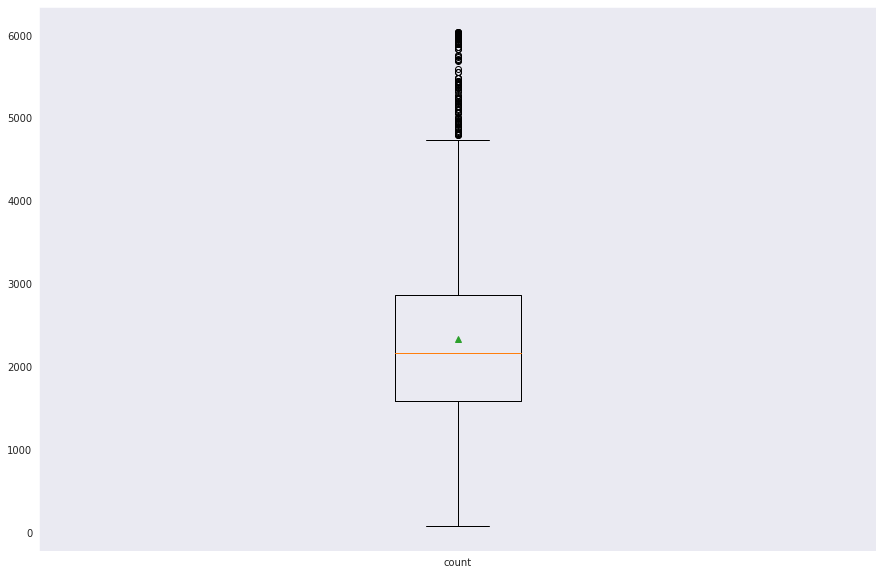

In [5]:
# Step 1.3 Statistic Info Plot 
# boxplot
sns.set_style(style='dark')
plt.figure(figsize=(15,10))

plt.boxplot(length_train_list,
            labels=['count'], # xlabel name setting
            showmeans=True) 

Text(0, 0.5, 'number of Text')

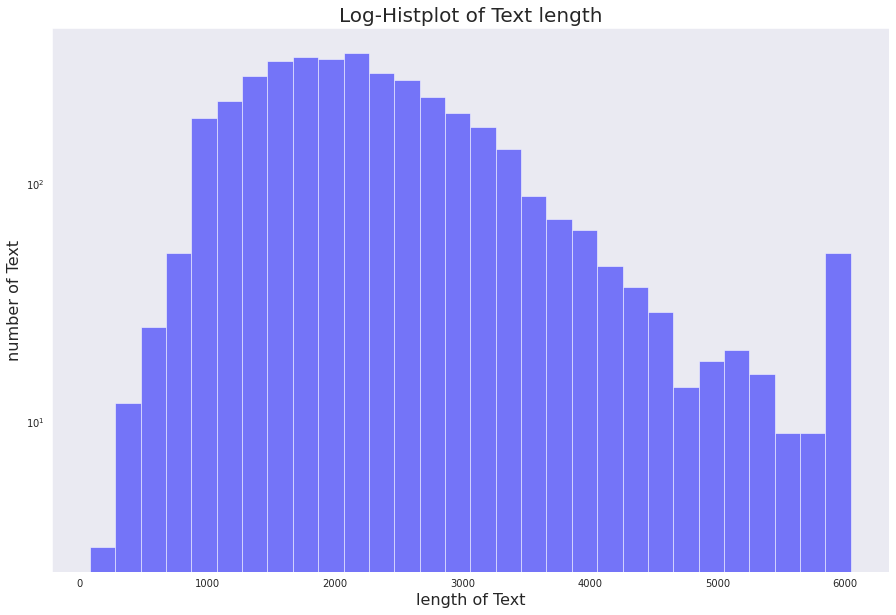

In [6]:
# log scale histplot
sns.set_style(style='dark')
plt.figure(figsize=(15,10))

plt.hist(length_train_list, bins=30, alpha=0.5, color='blue', label='word') # bins => Number of Data in Xlim
plt.yscale('log')
plt.title("Log-Histplot of Text length", fontsize=20)
plt.xlabel("length of Text", fontsize=16)
plt.ylabel("number of Text", fontsize=16)

(-0.5, 799.5, 599.5, -0.5)

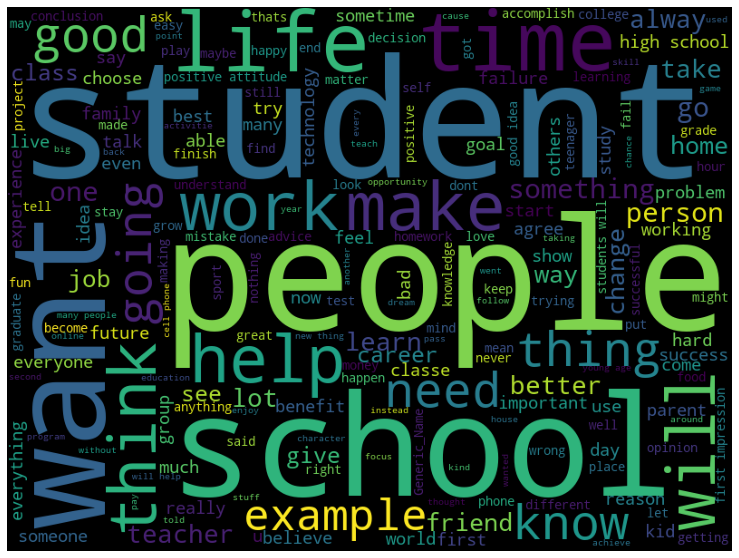

In [7]:
# Step 1.4 WordCloud
cloud = WordCloud(width=800,
                  height=600,
                  ).generate(" ".join(labels['full_text']))
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis('off') 

In [8]:
# Step 1.5 Statistic Info => Six Measures
# Make DataFrame for Statistic Info
measure_name = ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']
cohesion_list = list(labels['cohesion'])
syntax_list = list(labels['syntax'])
vocabulary_list = list(labels['vocabulary'])
phraseology_list = list(labels['phraseology'])
grammar_list = list(labels['grammar'])
conventions_list = list(labels['conventions'])

measure_df = pd.DataFrame({'Max' : [np.max(cohesion_list), np.max(syntax_list), np.max(vocabulary_list), 
                                   np.max(phraseology_list), np.max(grammar_list), np.max(conventions_list)],
                          'Min' : [np.min(cohesion_list), np.min(syntax_list), np.min(vocabulary_list), 
                                   np.min(phraseology_list), np.min(grammar_list), np.min(conventions_list)],
                          'Mean' : [np.mean(cohesion_list), np.mean(syntax_list), np.mean(vocabulary_list), 
                                   np.mean(phraseology_list), np.mean(grammar_list), np.mean(conventions_list)],
                          'Std' : [np.std(cohesion_list), np.std(syntax_list), np.std(vocabulary_list), 
                                   np.std(phraseology_list), np.std(grammar_list), np.std(conventions_list)],
                          'Median' : [np.median(cohesion_list), np.median(syntax_list), np.median(vocabulary_list), 
                                   np.median(phraseology_list), np.median(grammar_list), np.median(conventions_list)]})
measure_df.index = [name for name in measure_name]
measure_df

,Max,Min,Mean,Std,Median
cohesion,5.0,1.0,3.127077,0.662458,3.0
syntax,5.0,1.0,3.028254,0.644317,3.0
vocabulary,5.0,1.0,3.235745,0.583074,3.0
phraseology,5.0,1.0,3.116850,0.655913,3.0
grammar,5.0,1.0,3.032856,0.699751,3.0
conventions,5.0,1.0,3.081053,0.671364,3.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f16a9205290>,
 'caps': [<matplotlib.lines.Line2D at 0x7f16a92061d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f16a9205b10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f16a9206990>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f16a9207150>],
 'means': [<matplotlib.lines.Line2D at 0x7f16a9206e10>]}

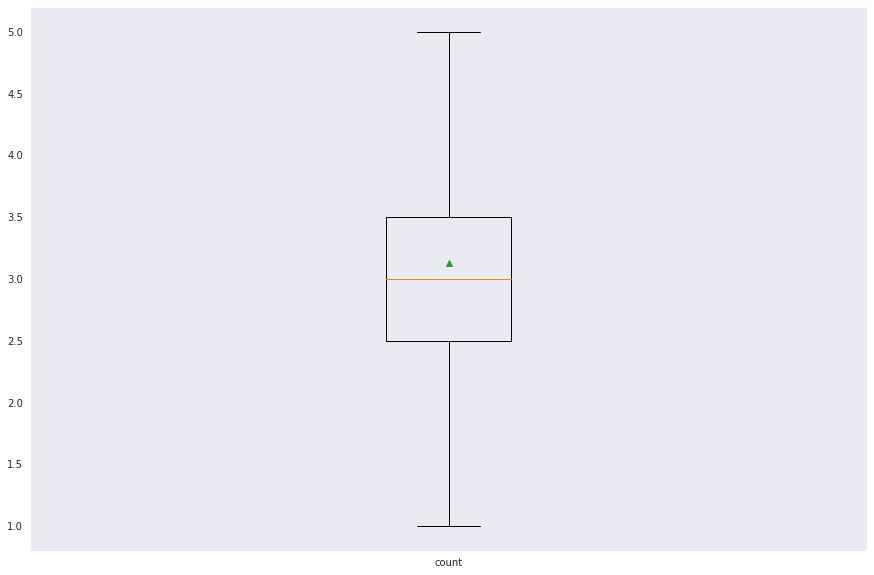

In [9]:
# box plot
sns.set_style(style='dark')
plt.figure(figsize=(15,10))

plt.boxplot(cohesion_list,
            labels=['count'], # xlabel name setting
            showmeans=True) # Green Triangle Token display setting

Text(0, 0.5, 'number of conventions')

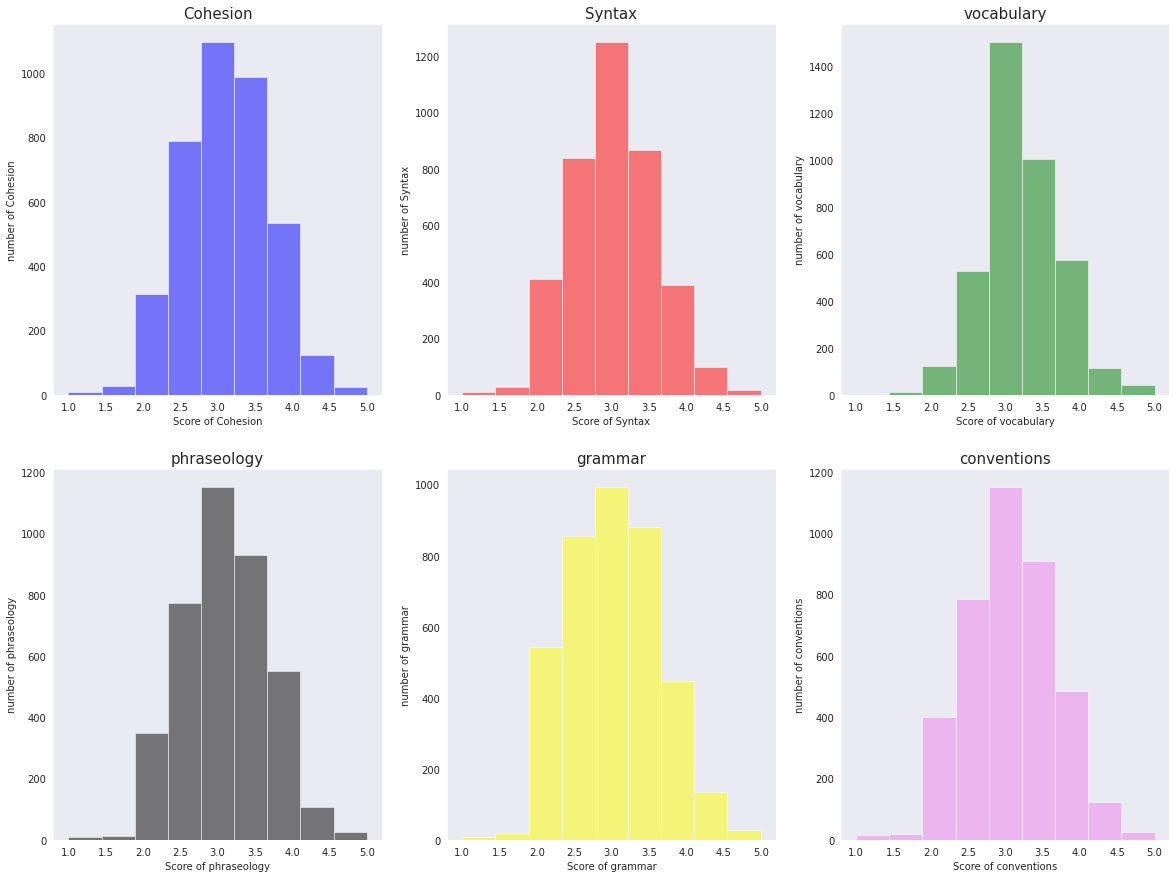

In [10]:
# Sub-histplot
sns.set_style(style='dark')
plt.figure(figsize=(20,15))

# cohesion_list
plt.subplot(2,3,1)
plt.hist(cohesion_list, bins=9, alpha=0.5, color='blue', label='word')
plt.title("Cohesion", fontsize=15)
plt.xlabel("Score of Cohesion", fontsize=10)
plt.ylabel("number of Cohesion", fontsize=10)

# syntax_list
plt.subplot(2,3,2)
plt.hist(syntax_list, bins=9, alpha=0.5, color='red', label='word')
plt.title("Syntax", fontsize=15)
plt.xlabel("Score of Syntax", fontsize=10)
plt.ylabel("number of Syntax", fontsize=10)

# vocabulary_list
plt.subplot(2,3,3)
plt.hist(vocabulary_list, bins=9, alpha=0.5, color='green', label='word')
plt.title("vocabulary", fontsize=15)
plt.xlabel("Score of vocabulary", fontsize=10)
plt.ylabel("number of vocabulary", fontsize=10)

# phraseology_list
plt.subplot(2,3,4)
plt.hist(phraseology_list, bins=9, alpha=0.5, color='black', label='word')
plt.title("phraseology", fontsize=15)
plt.xlabel("Score of phraseology", fontsize=10)
plt.ylabel("number of phraseology", fontsize=10)

# grammar_list
plt.subplot(2,3,5)
plt.hist(grammar_list, bins=9, alpha=0.5, color='yellow', label='word')
plt.title("grammar", fontsize=15)
plt.xlabel("Score of grammar", fontsize=10)
plt.ylabel("number of grammar", fontsize=10)

# conventions_list
plt.subplot(2,3,6)
plt.hist(conventions_list, bins=9, alpha=0.5, color='violet', label='word')
plt.title("conventions", fontsize=15)
plt.xlabel("Score of conventions", fontsize=10)
plt.ylabel("number of conventions", fontsize=10)

**[Data Insight]**  
1) **Distribution of Six Measures are almost ranged between 2.5 ~ 3.5**  
2) All of them (Six Measures) have same range between 1.0 ~ 5.0  
**=> We can easily use them in ML & DL Train Pipeline, NOT Need to preprocess for Six Measures**

In [11]:
# Make Co-relation Table For Six Measures
# Pearson Co-Relation
measure_corr = labels[measure_name].corr() # Default => Pearson Co-Relation
measure_corr

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
cohesion,1.000000,0.695459,0.666151,0.690058,0.638689,0.666151
syntax,0.695459,1.000000,0.680562,0.725467,0.709525,0.700025
vocabulary,0.666151,0.680562,1.000000,0.735261,0.654852,0.664292
phraseology,0.690058,0.725467,0.735261,1.000000,0.719746,0.666842
grammar,0.638689,0.709525,0.654852,0.719746,1.000000,0.673301
conventions,0.666151,0.700025,0.664292,0.666842,0.673301,1.000000


<AxesSubplot:>

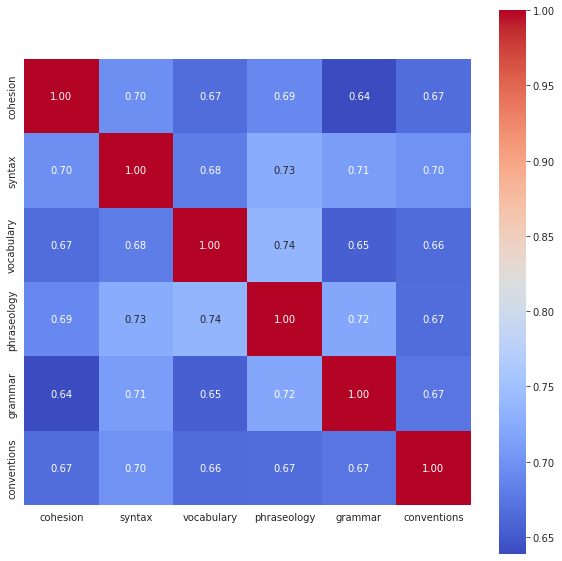

In [12]:
# Co-Relation Matrix
plt.figure(figsize=(10,10))
sns.heatmap(measure_corr, 
            xticklabels=measure_corr.columns, # Xlim Label Name Setting
            yticklabels=measure_corr.columns, # Ylim Label Name Setting
            square=True, # Square Matrix Setting
            annot=True, # Specific Value of Co-Relation Setting
            cmap="coolwarm", # Color Setting
            fmt=".2f") # range of float Setting

**[Data Insight]**  
1) All Values are more than 0.6  
2) All Values are defined in range[0.64, 0.75]  
**=> All Values are connected Each other, But there are "NO Strong & Unique Connection" in Six Measures**

# **📝🔍 Preprocessing**
**[Data Insight 1]**  
Intuitively, There are **"Few STOPWORDS"** in Word Cloud  
One of Six Measures is **"Grammar"** and we train them to our model  
Also, All of Six Measures have **"Co-Relation"** with **"Each other"**  

**Therefore, I think we don't need to remove STOPWORDS using several model (NLTK, WordCloud)**

**[Data Insight 2]**  
In Data Insight 1, I said Grammar is a metric **"needed model to learning"**  
In Common NLP Task, we need to **"remove Punctuation" & "lower All Capital Alphabet"**, **But** At this time we need to check Grammar & Related Metrics,    
So We **"need to check"** about **"Punctuation" & "Capital"** in Train Data and **"decide"** use Punctuation & Capital **"IN Train Model" or "NOT"**

**[Order of Preprocessing]**
*  **📄🔍 Step 1. Check Punctuation & Capital**
*  **👍👎 Step 2. Decide Using Punctuation & Capital at Train Model**
*  **✔️📄 Step 3. Check Good & Bad Score Examples**
*  **✂️📄 Step 4. Tokenize & Vectorize**

## **📄🔍 Step 1. Check Punctuation & Capital**

In [13]:
# Step 1.1 Statistic Info => Check Punctuation & Capital
qmarks = np.mean(labels['full_text'].apply(lambda x: '?' in x)) 
emarks = np.mean(labels['full_text'].apply(lambda x: '!' in x)) 
fullstop = np.mean(labels['full_text'].apply(lambda x: '.' in x))
capital_first = np.mean(labels['full_text'].apply(lambda x: x[0].isupper()))
capitals = np.mean(labels['full_text'].apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(labels['full_text'].apply(lambda x: max([y.isdigit() for y in x])))

# Percentage
print('Having Question Mark: {:.2f}%'.format(qmarks * 100)) # Percentage of How many data using Question Mark
print('Having Exclamation Mark: {:.2f}%'.format(emarks * 100)) # Percentage of How many data using Exclamation Mark
print('Having Full Stop: {:.2f}%'.format(fullstop * 100)) # Percentage of How many data using Full Stop
print('Start with Capital: {:.2f}%'.format(capital_first * 100))
print('Having Capital: {:.2f}%'.format(capitals * 100))
print('Having Number: {:.2f}%'.format(numbers * 100))

Having Question Mark: 28.94%
Having Exclamation Mark: 5.88%
Having Full Stop: 99.72%
Start with Capital: 93.84%
Having Capital: 99.21%
Having Number: 27.56%


We need to **“Cross Check & Find Relation"** between Example (having punctuation or Capital) and Metrics

### **❗️❓Part 1. Punctuation**

In [14]:
# Step 1.2 Cross Check & Find Relation
# Between Example of having Punctuation or Cpaital and Metrics

# Exclamation Mark
emarks_list = list(labels['full_text'].apply(lambda x: '!' in x))
having_emarks = [idx for idx, emark in enumerate(emarks_list) if emark == True]
exclamation_labels = labels.loc[[idx for idx in emarks_list]]
exclamation_labels = exclamation_labels.iloc[:,2:8]
exclamation_labels[[idx for idx in exclamation_labels.columns]].mean(), exclamation_labels[[idx for idx in exclamation_labels.columns]].std()

(cohesion       3.256522
 syntax         3.191304
 vocabulary     3.389130
 phraseology    3.289130
 grammar        3.217391
 conventions    3.182609
 dtype: float64,
 cohesion       0.658718
 syntax         0.674173
 vocabulary     0.594453
 phraseology    0.628726
 grammar        0.727292
 conventions    0.671733
 dtype: float64)

It is very Rough & Common Approach, **BUT Metrics Scores are better than NOT Exclamation**.  
Let's check Question Marks

In [15]:
# Question Mark
qmarks_list = list(labels['full_text'].apply(lambda x: '?' in x))
having_qmarks = [idx for idx, qmark in enumerate(qmarks_list) if qmark == True]
question_labels = labels.loc[[idx for idx in qmarks_list]]
question_labels = question_labels.iloc[:,2:8]
question_labels[[idx for idx in question_labels.columns]].mean(), question_labels[[idx for idx in question_labels.columns]].std()

(cohesion       3.255742
 syntax         3.144876
 vocabulary     3.338781
 phraseology    3.225707
 grammar        3.129417
 conventions    3.181095
 dtype: float64,
 cohesion       0.630574
 syntax         0.620701
 vocabulary     0.564440
 phraseology    0.635372
 grammar        0.695311
 conventions    0.645241
 dtype: float64)

**Question mark's Result similar as Exclamation**  
Let's Make DataFrame for Cross Check 2 Types of Data **(having punctuation, NOT having punctuation)**

In [16]:
# Punctuation_list => Text idx list that Having Exclamation Mark or Question Mark 
punctuation_lists = list(set(having_emarks + having_qmarks))
len(having_emarks), len(having_qmarks), len(punctuation_lists) # 127 Text have '!' & '?'

(230, 1132, 1235)

In [17]:
# Make DataFrame for Having Exclamation or Question
punctuation_labels = labels.loc[[idx for idx in punctuation_lists]]
punctuation_labels = punctuation_labels.iloc[:,2:8]
punctuation_df = pd.DataFrame({
    'Max' : punctuation_labels[[idx for idx in punctuation_labels.columns]].max(),
    'Min' : punctuation_labels[[idx for idx in punctuation_labels.columns]].min(),
    'Mean' : punctuation_labels[[idx for idx in punctuation_labels.columns]].mean(),
    'Std' : punctuation_labels[[idx for idx in punctuation_labels.columns]].std(),
    'Median' : punctuation_labels[[idx for idx in punctuation_labels.columns]].median()})
punctuation_df

,Max,Min,Mean,Std,Median
cohesion,5.0,1.5,3.249393,0.640469,3.5
syntax,5.0,1.5,3.146964,0.629551,3.0
vocabulary,5.0,1.5,3.342510,0.570491,3.5
phraseology,5.0,1.5,3.226316,0.636857,3.0
grammar,5.0,1.5,3.131984,0.699031,3.0
conventions,5.0,1.0,3.178543,0.650945,3.0


In [18]:
# Make DataFrame for NOT Having Exclamation Mark or Question Mark
# no_punctuation_list => Text idx list that NOT Having Exclamation Mark or Question Mark 
labels_idx = list(labels['full_text'].index) # All Data's idx list
no_punctuation_lists = list(set(labels_idx) - set(punctuation_lists)) # 3911 - 1235 = 2676

no_punctuation_labels = labels.loc[[idx for idx in no_punctuation_lists]]
no_punctuation_labels = no_punctuation_labels.iloc[:,2:8]
no_punctuation_df = pd.DataFrame({
    'Max' : no_punctuation_labels[[idx for idx in no_punctuation_labels.columns]].max(),
    'Min' : no_punctuation_labels[[idx for idx in no_punctuation_labels.columns]].min(),
    'Mean' : no_punctuation_labels[[idx for idx in no_punctuation_labels.columns]].mean(),
    'Std' : no_punctuation_labels[[idx for idx in no_punctuation_labels.columns]].std(),
    'Median' : no_punctuation_labels[[idx for idx in no_punctuation_labels.columns]].median()
})
no_punctuation_df

,Max,Min,Mean,Std,Median
cohesion,5.0,1.0,3.070628,0.665056,3.0
syntax,5.0,1.0,2.973468,0.643912,3.0
vocabulary,5.0,1.0,3.186472,0.582438,3.0
phraseology,5.0,1.0,3.066330,0.658652,3.0
grammar,5.0,1.0,2.987108,0.695595,3.0
conventions,5.0,1.0,3.036061,0.676099,3.0


### **🔠 Part 2. Capital**

In [19]:
# no_capital_first => NOT Having Capital Alphabet in First Word of Each Data Instance
capital_first_lists = list(labels['full_text'].apply(lambda x: x[0].isupper()))
no_capital_first = [idx for idx, capital in enumerate(capital_first_lists) if capital == False]
no_capital_first_labels = labels.loc[[idx for idx in no_capital_first]]
no_capital_first_labels = no_capital_first_labels.iloc[:,2:8]
no_capital_first_score = no_capital_first_labels[[idx for idx in no_capital_first_labels.columns]].mean()

**[Question]**  
Why Using Capital Alphabet in Starting Each Data Instance?? 

**[Answer]**  
We can't check all capital Alphabet. So I think if Some of Data Instance NOT Having Capital Alphabet in starting,  
their six metrics may be Low.  
**Because Capitalizing the first word in a sentence & paragraph is a very basic common sense,**  
**Students who failed to keep common sense predicted low performance in other areas**

In [20]:
# capital_first => Having Capital Alphabet in First Word of Each Data Instance
capital_first = [idx for idx, capital in enumerate(capital_first_lists) if capital == True]
capital_first_labels = labels.loc[[idx for idx in capital_first]]
capital_first_labels = capital_first_labels.iloc[:,2:8]
capital_first_score = capital_first_labels[[idx for idx in capital_first_labels.columns]].mean()

##  **👍👎 Step 2. Decide Using Punctuation & Capital at Train Model**

In [21]:
# Step 2.1 Punctuation Result
punctuation_df['Mean'] - no_punctuation_df['Mean'] # There are significant difference 

cohesion       0.178765
syntax         0.173496
vocabulary     0.156038
phraseology    0.159985
grammar        0.144876
conventions    0.142481
Name: Mean, dtype: float64

In [22]:
# Step 2.2 Capital Result
capital_first_score - no_capital_first_score

cohesion       0.378624
syntax         0.410389
vocabulary     0.315343
phraseology    0.374358
grammar        0.382129
conventions    0.477710
dtype: float64

**[Data Insight 1]**  
**"Having Exclamation & Question Mark"** Text have **"better scores"** than NOT having those marks.  
**Difference ranged in 0.15 ~ 0.20**  
**So, We NEED to left them for more reasonable training**  

**[Data Insight 2]**  
**"Using Capital Alphabet in Starting Each Data Instance(Capital_first_score)"** have **"better scores"** than  
NOT Using Capital Alphabet (no_capital_first_score)  
**Difference ranged in 0.30 ~ 0.50**        
**So, we NEED to left them for more reasonable training**

## **✔️📄 Step 3. Check Good & Bad Score Examples**